In [71]:
import torch 
from torchvision import transforms, datasets 
BATCH_SIZE = 64

# Load Dataset 
trainset = datasets.FashionMNIST(
    root = '../data/FASHIONMNIST/',
    train = True,
    download = True, 
    transform = transforms.ToTensor()
)

train_load = torch.utils.data.DataLoader(
    dataset = trainset,
    batch_size = BATCH_SIZE,
    shuffle = True, 
    num_workers = 2
)


Extracting ../data/FASHIONMNIST/FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data/FASHIONMNIST/FashionMNIST\raw


Extracting ../data/FASHIONMNIST/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data/FASHIONMNIST/FashionMNIST\raw



Extracting ../data/FASHIONMNIST/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data/FASHIONMNIST/FashionMNIST\raw


Extracting ../data/FASHIONMNIST/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data/FASHIONMNIST/FashionMNIST\raw
Processing...


c:\users\esthe\miniconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [73]:
from torch import nn, optim 

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(), 
            nn.Linear(128, 28*28),
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
    
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print("Model : ", model)
print("Device: ", DEVICE)


Model :  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cuda


In [74]:
view_data = trainset.data[:5].view(-1, 28*28)
view_data = view_data.type(torch.FloatTensor) / 255.

In [75]:
# Definite Train & Evaluate 

def train(model, train_loader, optimizer):
    model.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28*28).to(DEVICE)
        y = x.view(-1, 28*28).to(DEVICE)
        label = label.to(DEVICE)
        
        encoded, decoded = model(x)
        loss = criterion(decoded, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step %100 == 0:
            print("Train Epoch : {} [{}/{} ({:.0f}%)] \tLoss: {:.6f}".format(epoch, step *len(x), len(train_loader.dataset),100. * step / len(train_loader), loss.item()))

Train Epoch : 1 [0/48000 (0%)] 	Loss: 6866.799805
Train Epoch : 1 [6400/48000 (13%)] 	Loss: 1895.682983
Train Epoch : 1 [12800/48000 (27%)] 	Loss: 1313.541016
Train Epoch : 1 [19200/48000 (40%)] 	Loss: 1125.449097
Train Epoch : 1 [25600/48000 (53%)] 	Loss: 1026.051025
Train Epoch : 1 [32000/48000 (67%)] 	Loss: 944.344849
Train Epoch : 1 [38400/48000 (80%)] 	Loss: 988.901978
Train Epoch : 1 [44800/48000 (93%)] 	Loss: 868.164185


[Epoch 1]


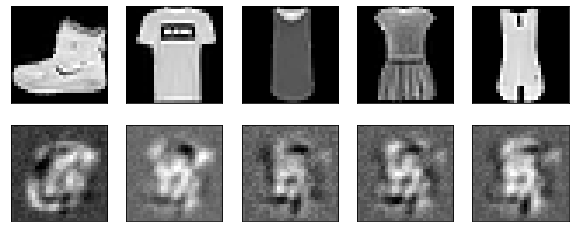

Train Epoch : 2 [0/48000 (0%)] 	Loss: 817.299438
Train Epoch : 2 [6400/48000 (13%)] 	Loss: 882.106018
Train Epoch : 2 [12800/48000 (27%)] 	Loss: 869.692322
Train Epoch : 2 [19200/48000 (40%)] 	Loss: 841.399231
Train Epoch : 2 [25600/48000 (53%)] 	Loss: 793.417419
Train Epoch : 2 [32000/48000 (67%)] 	Loss: 827.028687
Train Epoch : 2 [38400/48000 (80%)] 	Loss: 825.259888
Train Epoch : 2 [44800/48000 (93%)] 	Loss: 894.406372
[Epoch 2]


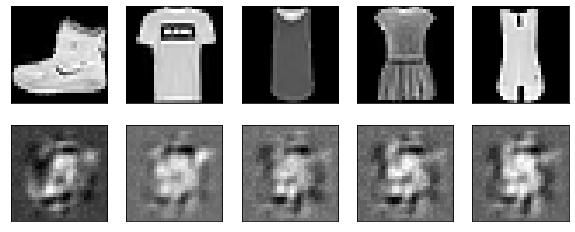

Train Epoch : 3 [0/48000 (0%)] 	Loss: 769.255798
Train Epoch : 3 [6400/48000 (13%)] 	Loss: 784.672974
Train Epoch : 3 [12800/48000 (27%)] 	Loss: 859.923157
Train Epoch : 3 [19200/48000 (40%)] 	Loss: 825.235657
Train Epoch : 3 [25600/48000 (53%)] 	Loss: 758.694885
Train Epoch : 3 [32000/48000 (67%)] 	Loss: 838.325745
Train Epoch : 3 [38400/48000 (80%)] 	Loss: 798.328369
Train Epoch : 3 [44800/48000 (93%)] 	Loss: 795.999512
[Epoch 3]


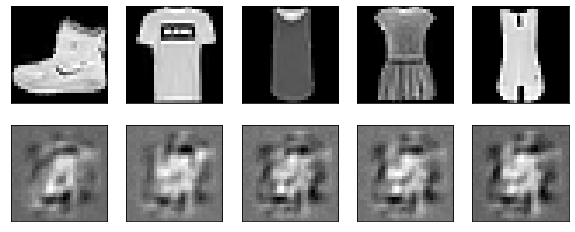

Train Epoch : 4 [0/48000 (0%)] 	Loss: 771.570618
Train Epoch : 4 [6400/48000 (13%)] 	Loss: 807.462646
Train Epoch : 4 [12800/48000 (27%)] 	Loss: 789.375000
Train Epoch : 4 [19200/48000 (40%)] 	Loss: 791.880798
Train Epoch : 4 [25600/48000 (53%)] 	Loss: 741.561523
Train Epoch : 4 [32000/48000 (67%)] 	Loss: 653.247192
Train Epoch : 4 [38400/48000 (80%)] 	Loss: 721.334351
Train Epoch : 4 [44800/48000 (93%)] 	Loss: 820.330994
[Epoch 4]


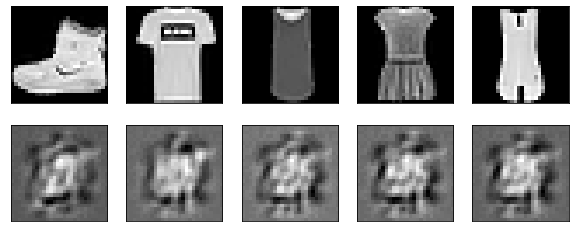

Train Epoch : 5 [0/48000 (0%)] 	Loss: 679.884216
Train Epoch : 5 [6400/48000 (13%)] 	Loss: 718.626953
Train Epoch : 5 [12800/48000 (27%)] 	Loss: 796.368347
Train Epoch : 5 [19200/48000 (40%)] 	Loss: 736.001404
Train Epoch : 5 [25600/48000 (53%)] 	Loss: 730.455200
Train Epoch : 5 [32000/48000 (67%)] 	Loss: 770.134094
Train Epoch : 5 [38400/48000 (80%)] 	Loss: 744.562622
Train Epoch : 5 [44800/48000 (93%)] 	Loss: 757.391479
[Epoch 5]


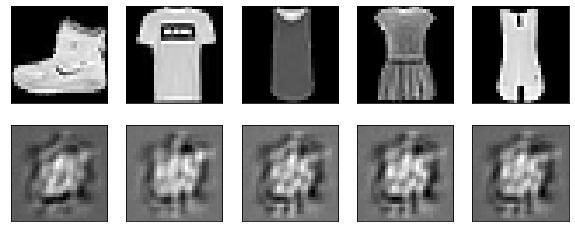

Train Epoch : 6 [0/48000 (0%)] 	Loss: 749.063599
Train Epoch : 6 [6400/48000 (13%)] 	Loss: 715.999023
Train Epoch : 6 [12800/48000 (27%)] 	Loss: 811.042847
Train Epoch : 6 [19200/48000 (40%)] 	Loss: 736.552429
Train Epoch : 6 [25600/48000 (53%)] 	Loss: 765.703613
Train Epoch : 6 [32000/48000 (67%)] 	Loss: 722.297363
Train Epoch : 6 [38400/48000 (80%)] 	Loss: 777.368286
Train Epoch : 6 [44800/48000 (93%)] 	Loss: 734.712219
[Epoch 6]


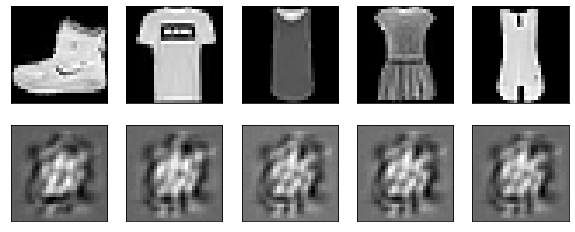

Train Epoch : 7 [0/48000 (0%)] 	Loss: 733.799194
Train Epoch : 7 [6400/48000 (13%)] 	Loss: 648.095398
Train Epoch : 7 [12800/48000 (27%)] 	Loss: 710.680725
Train Epoch : 7 [19200/48000 (40%)] 	Loss: 791.030273
Train Epoch : 7 [25600/48000 (53%)] 	Loss: 711.650818
Train Epoch : 7 [32000/48000 (67%)] 	Loss: 747.624023
Train Epoch : 7 [38400/48000 (80%)] 	Loss: 703.134521
Train Epoch : 7 [44800/48000 (93%)] 	Loss: 739.636475
[Epoch 7]


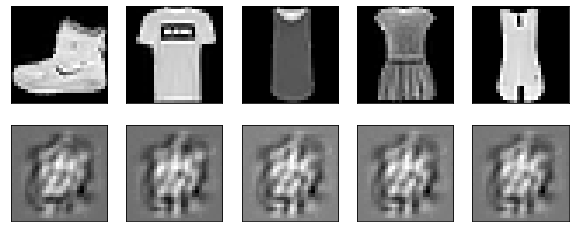

Train Epoch : 8 [0/48000 (0%)] 	Loss: 750.962646
Train Epoch : 8 [6400/48000 (13%)] 	Loss: 794.037903
Train Epoch : 8 [12800/48000 (27%)] 	Loss: 716.729126
Train Epoch : 8 [19200/48000 (40%)] 	Loss: 656.500549
Train Epoch : 8 [25600/48000 (53%)] 	Loss: 764.954651
Train Epoch : 8 [32000/48000 (67%)] 	Loss: 723.149048
Train Epoch : 8 [38400/48000 (80%)] 	Loss: 697.210449
Train Epoch : 8 [44800/48000 (93%)] 	Loss: 704.693970
[Epoch 8]


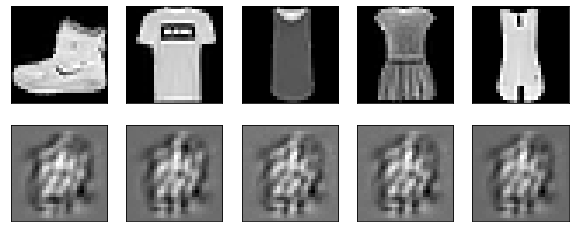

Train Epoch : 9 [0/48000 (0%)] 	Loss: 759.882263
Train Epoch : 9 [6400/48000 (13%)] 	Loss: 692.890137
Train Epoch : 9 [12800/48000 (27%)] 	Loss: 683.369873
Train Epoch : 9 [19200/48000 (40%)] 	Loss: 731.948730
Train Epoch : 9 [25600/48000 (53%)] 	Loss: 638.953918
Train Epoch : 9 [32000/48000 (67%)] 	Loss: 712.059937
Train Epoch : 9 [38400/48000 (80%)] 	Loss: 695.578613
Train Epoch : 9 [44800/48000 (93%)] 	Loss: 768.946350
[Epoch 9]


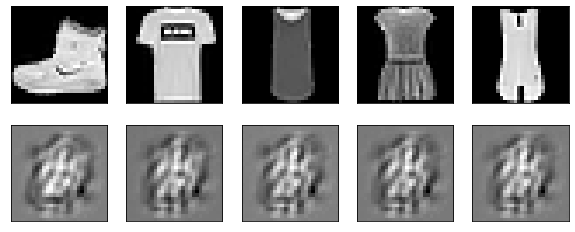

Train Epoch : 10 [0/48000 (0%)] 	Loss: 659.490845
Train Epoch : 10 [6400/48000 (13%)] 	Loss: 688.679138
Train Epoch : 10 [12800/48000 (27%)] 	Loss: 665.850342
Train Epoch : 10 [19200/48000 (40%)] 	Loss: 699.678528
Train Epoch : 10 [25600/48000 (53%)] 	Loss: 668.897766
Train Epoch : 10 [32000/48000 (67%)] 	Loss: 681.081482
Train Epoch : 10 [38400/48000 (80%)] 	Loss: 671.234375
Train Epoch : 10 [44800/48000 (93%)] 	Loss: 722.848694
[Epoch 10]


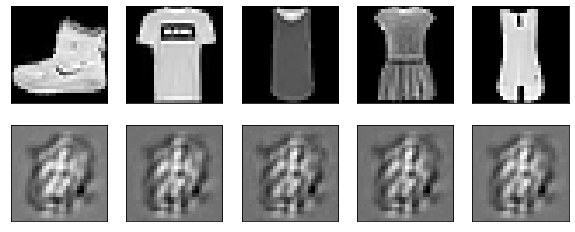

In [77]:
'''Training'''

import numpy as np
import matplotlib.pyplot as plt

EPOCHS = 10

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print("[Epoch {}]".format(epoch))
    
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28,28))
        a[0][idx].imshow(img, cmap = "gray")
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
    
    for idx in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[idx], (28,28))
        a[1][idx].imshow(img, cmap = "gray")
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()        

Model:  AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)
Device:  cuda
Train Epoch : 1 [0/48000 (0%)] 	Loss: 7175.364746
Train Epoch : 1 [6400/48000 (13%)] 	Loss: 5229.232422
Train Epoch : 1 [12800/48000 (27%)] 	Loss: 4504.003418
Train Epoch : 1 [19200/48000 (40%)] 	Loss: 4408.399902
Train Epoch : 1 [25600/48000 (53%)] 	Loss: 4805.782227
Train Epoch : 1 [32000/48000 (67%)] 	Loss: 4117.745605
Train Epoch : 1 [38400/48000 (80%)] 	Loss: 4610.780273
Train Epoch : 1 [44800/48000 (93%)] 	Loss: 4384.077637
[Epoch 1]


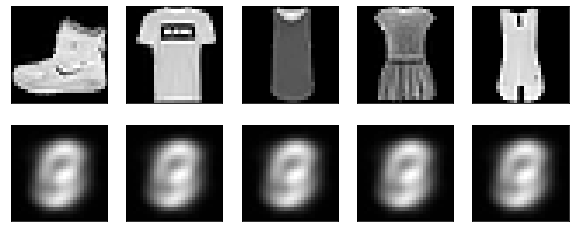

Train Epoch : 2 [0/48000 (0%)] 	Loss: 4227.491699
Train Epoch : 2 [6400/48000 (13%)] 	Loss: 4254.348145
Train Epoch : 2 [12800/48000 (27%)] 	Loss: 4641.031250
Train Epoch : 2 [19200/48000 (40%)] 	Loss: 4595.407715
Train Epoch : 2 [25600/48000 (53%)] 	Loss: 4348.955078
Train Epoch : 2 [32000/48000 (67%)] 	Loss: 4234.398438
Train Epoch : 2 [38400/48000 (80%)] 	Loss: 4630.407227
Train Epoch : 2 [44800/48000 (93%)] 	Loss: 4342.614746
[Epoch 2]


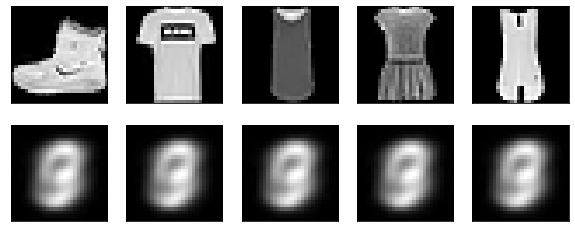

Train Epoch : 3 [0/48000 (0%)] 	Loss: 4427.124512
Train Epoch : 3 [6400/48000 (13%)] 	Loss: 4392.051758
Train Epoch : 3 [12800/48000 (27%)] 	Loss: 4183.402832
Train Epoch : 3 [19200/48000 (40%)] 	Loss: 4295.201660
Train Epoch : 3 [25600/48000 (53%)] 	Loss: 4385.134277
Train Epoch : 3 [32000/48000 (67%)] 	Loss: 4414.625488
Train Epoch : 3 [38400/48000 (80%)] 	Loss: 4485.049805
Train Epoch : 3 [44800/48000 (93%)] 	Loss: 4647.097656
[Epoch 3]


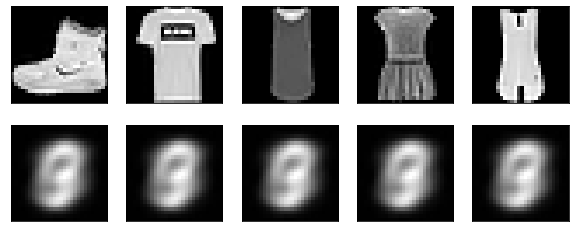

Train Epoch : 4 [0/48000 (0%)] 	Loss: 4364.451660
Train Epoch : 4 [6400/48000 (13%)] 	Loss: 4487.715820
Train Epoch : 4 [12800/48000 (27%)] 	Loss: 4226.446289
Train Epoch : 4 [19200/48000 (40%)] 	Loss: 4517.531738
Train Epoch : 4 [25600/48000 (53%)] 	Loss: 4541.703613
Train Epoch : 4 [32000/48000 (67%)] 	Loss: 4293.013672
Train Epoch : 4 [38400/48000 (80%)] 	Loss: 4503.409668
Train Epoch : 4 [44800/48000 (93%)] 	Loss: 4426.916016
[Epoch 4]


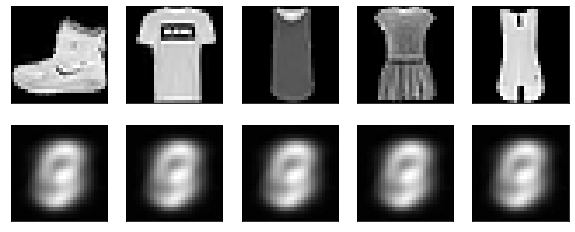

Train Epoch : 5 [0/48000 (0%)] 	Loss: 4295.225098
Train Epoch : 5 [6400/48000 (13%)] 	Loss: 4383.707031
Train Epoch : 5 [12800/48000 (27%)] 	Loss: 4254.659180
Train Epoch : 5 [19200/48000 (40%)] 	Loss: 4525.640137
Train Epoch : 5 [25600/48000 (53%)] 	Loss: 4556.514160
Train Epoch : 5 [32000/48000 (67%)] 	Loss: 4579.342773
Train Epoch : 5 [38400/48000 (80%)] 	Loss: 4374.288574
Train Epoch : 5 [44800/48000 (93%)] 	Loss: 4647.601562
[Epoch 5]


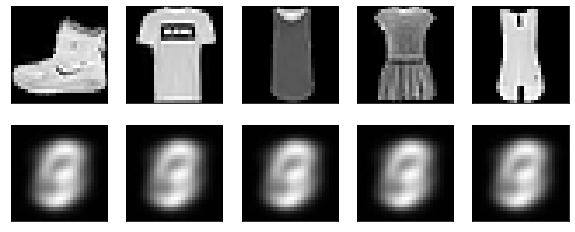

Train Epoch : 6 [0/48000 (0%)] 	Loss: 4201.035645
Train Epoch : 6 [6400/48000 (13%)] 	Loss: 4031.460449
Train Epoch : 6 [12800/48000 (27%)] 	Loss: 4401.397949
Train Epoch : 6 [19200/48000 (40%)] 	Loss: 4605.529785
Train Epoch : 6 [25600/48000 (53%)] 	Loss: 4261.524902
Train Epoch : 6 [32000/48000 (67%)] 	Loss: 4549.669434
Train Epoch : 6 [38400/48000 (80%)] 	Loss: 4720.837402
Train Epoch : 6 [44800/48000 (93%)] 	Loss: 4343.735840
[Epoch 6]


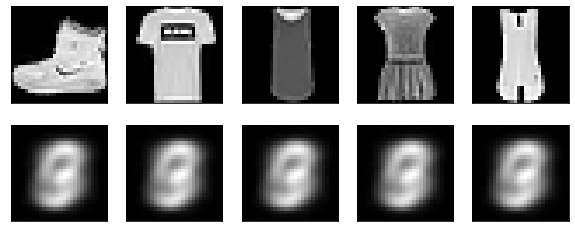

Train Epoch : 7 [0/48000 (0%)] 	Loss: 4341.344727
Train Epoch : 7 [6400/48000 (13%)] 	Loss: 4258.407227
Train Epoch : 7 [12800/48000 (27%)] 	Loss: 4317.710938
Train Epoch : 7 [19200/48000 (40%)] 	Loss: 4388.646484
Train Epoch : 7 [25600/48000 (53%)] 	Loss: 4353.468262
Train Epoch : 7 [32000/48000 (67%)] 	Loss: 4573.713379
Train Epoch : 7 [38400/48000 (80%)] 	Loss: 4478.796875
Train Epoch : 7 [44800/48000 (93%)] 	Loss: 4177.578125
[Epoch 7]


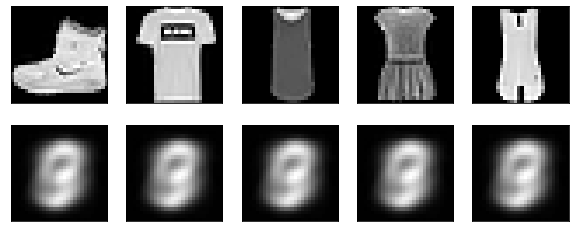

Train Epoch : 8 [0/48000 (0%)] 	Loss: 4303.940430
Train Epoch : 8 [6400/48000 (13%)] 	Loss: 4342.071777
Train Epoch : 8 [12800/48000 (27%)] 	Loss: 4226.285645
Train Epoch : 8 [19200/48000 (40%)] 	Loss: 4340.755859
Train Epoch : 8 [25600/48000 (53%)] 	Loss: 4374.824219
Train Epoch : 8 [32000/48000 (67%)] 	Loss: 4696.601074
Train Epoch : 8 [38400/48000 (80%)] 	Loss: 4252.901855
Train Epoch : 8 [44800/48000 (93%)] 	Loss: 4280.062988
[Epoch 8]


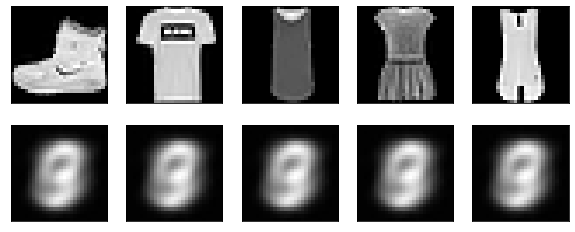

Train Epoch : 9 [0/48000 (0%)] 	Loss: 4613.062012
Train Epoch : 9 [6400/48000 (13%)] 	Loss: 4579.416992
Train Epoch : 9 [12800/48000 (27%)] 	Loss: 4673.621094
Train Epoch : 9 [19200/48000 (40%)] 	Loss: 4399.780762
Train Epoch : 9 [25600/48000 (53%)] 	Loss: 4313.130859
Train Epoch : 9 [32000/48000 (67%)] 	Loss: 4258.529297
Train Epoch : 9 [38400/48000 (80%)] 	Loss: 4280.238770
Train Epoch : 9 [44800/48000 (93%)] 	Loss: 4577.162109
[Epoch 9]


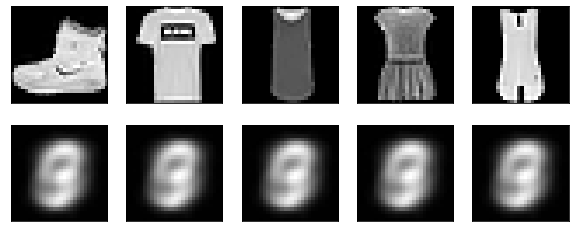

Train Epoch : 10 [0/48000 (0%)] 	Loss: 4399.819336
Train Epoch : 10 [6400/48000 (13%)] 	Loss: 4292.334961
Train Epoch : 10 [12800/48000 (27%)] 	Loss: 4482.021484
Train Epoch : 10 [19200/48000 (40%)] 	Loss: 4536.481934
Train Epoch : 10 [25600/48000 (53%)] 	Loss: 4682.177734
Train Epoch : 10 [32000/48000 (67%)] 	Loss: 4613.593262
Train Epoch : 10 [38400/48000 (80%)] 	Loss: 4478.084961
Train Epoch : 10 [44800/48000 (93%)] 	Loss: 4238.374023
[Epoch 10]


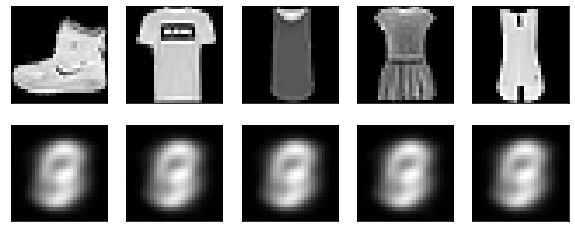

In [79]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()

print("Model: ", model)
print("Device: ", DEVICE)

EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_x = view_data.to(DEVICE)
    encoded_data, decoded_data = model(test_x)
    f, a = plt.subplots(2, 5, figsize = (10, 4))
    print("[Epoch {}]".format(epoch))
    for idx in range(5):
        img = np.reshape(view_data.data.numpy()[idx], (28, 28))
        a[0][idx].imshow(img, cmap = "gray")
        a[0][idx].set_xticks(())
        a[0][idx].set_yticks(())
        
    for idx in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[idx], (28, 28))
        a[1][idx].imshow(img, cmap = "gray")
        a[1][idx].set_xticks(())
        a[1][idx].set_yticks(())
    plt.show()

In [81]:
# !pip install lightgbm
# !pip install time
import time
import lightgbm as lgb
from sklearn.metrics import accuracy_score
start = time.time() 
lgb_dtrain = lgb.Dataset(data = trainset.train_data.view(-1, 28 * 28).numpy(), label = list(trainset.train_labels.numpy()))
lgb_param = {'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 20,
            'objective': 'multiclass',
            'num_class': len(set(list(trainset.train_labels.numpy()))) + 1}

num_round = 10000
lgb_model = lgb.train(params = lgb_param, num_boost_round = num_round, train_set = lgb_dtrain) 
lgb_model_predict = np.argmax(lgb_model.predict(trainset.train_data.view(-1, 28 * 28).numpy()), axis = 1) 
print("Accuracy: %.2f" % (accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), "%") 
print("Time: %.2f" % (time.time() - start), "seconds")

c:\users\esthe\miniconda3\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\users\esthe\miniconda3\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\users\esthe\miniconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.984824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170881
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 783
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Inf

In [82]:
trainset.train_labels.numpy()

array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

In [83]:
trainset.train_data.view(-1, 28 * 28).numpy()[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [84]:
train_encoded_x = trainset.train_data.view(-1, 28 * 28).to(DEVICE)
train_encoded_x = train_encoded_x.type(torch.FloatTensor)
train_encoded_x = train_encoded_x.to(DEVICE)
encoded_data, decoded_data = model(train_encoded_x)
encoded_data = encoded_data.to("cpu")

start = time.time() 
lgb_dtrain = lgb.Dataset(data = encoded_data.detach().numpy(), label = list(trainset.train_labels.numpy()))
lgb_param = {'max_depth': 10,
            'learning_rate': 0.001,
            'n_estimators': 20,
            'objective': 'multiclass',
            'num_class': len(set(list(trainset.train_labels.numpy()))) + 1}

num_round = 10000
lgb_model = lgb.train(params = lgb_param, num_boost_round = num_round, train_set = lgb_dtrain) 
lgb_model_predict = np.argmax(lgb_model.predict(encoded_data.detach().numpy()), axis = 1)
print("Accuracy: %.2f" % (accuracy_score(list(trainset.train_labels.numpy()), lgb_model_predict) * 100), "%") 
print("Time: %.2f" % (time.time() - start), "seconds")

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16148
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 64
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info]

In [85]:
encoded_data.detach().numpy()[0]


array([ 2.102102 ,  8.700806 ,  7.5712724,  7.3385634, -5.6323853,
        7.3185287,  5.4816513,  1.5963141, -5.349452 , -3.3211155,
       -8.820389 , -1.3995081, -6.282635 , -4.9165416,  4.4267783,
       -6.05016  , -6.827258 ,  8.076408 , -6.869896 ,  0.1254935,
        6.371924 ,  6.2704277,  9.290573 ,  5.9147058, -8.700291 ,
        6.377838 , -4.668087 , -7.4437194,  8.446738 , -9.2467785,
        6.909657 ,  6.9619436,  3.5932493, -7.14982  ,  6.3543954,
       -2.296812 , -2.3938708,  6.8955946, -4.262557 , -5.272211 ,
        7.049526 , -2.079643 , -5.475337 , -1.4123528, -4.222876 ,
        3.5821497,  8.249166 , -5.4261336, -6.26228  , -6.4462667,
        7.7816358,  3.5567322,  7.8754015,  3.8503413, -7.19788  ,
       -4.494629 , -4.96858  , -4.630693 , -8.093741 ,  7.825294 ,
       -9.151381 , -7.1894617,  8.33968  , -7.8006387], dtype=float32)